# Предварительный анализ важностей фичей

#### Подключим необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoost, CatBoostRegressor
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Включим отображение всех столбцов
pd.set_option('display.max_columns', None)

### Подгрузим Excel файлы с наборами данных.
#### "Обслед.xls'" с обследованиями загружать не будем, т.к. данное приложение для выявления заболеваний на ранних стадиях, соответственно исключим очевидные факторы.

In [3]:
#obsled = pd.read_excel('Обслед.xls')

passport = pd.read_excel('Паспорт.xls')
sovershen1 = pd.read_excel('Совершен1.xls')
epoch2 = pd.read_excel('EPOCH2.xls')
ipaq = pd.read_excel('IPAQ.xls')
dom_hoz = pd.read_excel('Дом_хоз.xls')
ocenka_terr = pd.read_excel('Оценка_терр.xlsx')
pitanie = pd.read_excel('Питание.xls')
pitanie2 = pd.read_excel('Питание2.xls')
semya = pd.read_excel('Семья.xls')
sovershen2 = pd.read_excel('Совершен2.xls')
fizish_akt = pd.read_excel('Физич_акт.xls')

### Предобработка данных 

In [4]:
# Заменим числовые значения
passport['Место проживания 1-город 2-село'] = passport['Место проживания 1-город 2-село'].replace(1, 'город')
passport['Место проживания 1-город 2-село'] = passport['Место проживания 1-город 2-село'].replace(2, 'село')

In [5]:
#Добавим в таблицы индексы, удалив столбец ID
passport.index = passport['ID']
passport = passport.drop('ID', axis=1)

sovershen1.index = sovershen1['ID']
sovershen1 = sovershen1.drop('ID', axis=1)

sovershen2.index = sovershen2['ID']
sovershen2 = sovershen2.drop('ID', axis=1)

epoch2.index = epoch2['ID']
epoch2 = epoch2.drop('ID', axis=1)

ipaq.index = ipaq['ID']
ipaq = ipaq.drop('ID', axis=1)

dom_hoz.index = dom_hoz['ID']
dom_hoz = dom_hoz.drop('ID', axis=1)

ocenka_terr.index = ocenka_terr['ID']
ocenka_terr = ocenka_terr.drop('ID', axis=1)

#obsled.index = obsled['ID']
#obsled = obsled.drop('ID', axis=1)

pitanie.index = pitanie['ID']
pitanie = pitanie.drop('ID', axis=1)

pitanie2.index = pitanie2['ID']
pitanie2 = pitanie2.drop('ID', axis=1)

semya.index = semya['ID']
semya = semya.drop('ID', axis=1)

fizish_akt.index = fizish_akt['ID']
fizish_akt = fizish_akt.drop('ID', axis=1)

In [6]:
#Объединим все таблицы в одну
df = passport.merge(sovershen1, left_index=True, right_index=True)
df = df.merge(sovershen2, left_index=True, right_index=True)
df = df.merge(epoch2, left_index=True, right_index=True)
df = df.merge(ipaq, left_index=True, right_index=True)
df = df.merge(dom_hoz, left_index=True, right_index=True)
df = df.merge(ocenka_terr, left_index=True, right_index=True)
#df = df.merge(obsled, left_index=True, right_index=True)
df = df.merge(pitanie, left_index=True, right_index=True)
df = df.merge(pitanie2, left_index=True, right_index=True)
df = df.merge(semya, left_index=True, right_index=True)
df = df.merge(fizish_akt, left_index=True, right_index=True)

### Посмотрим на некоторые данные построив графики 

In [7]:
df1 = df[['Сахарный диабет',	
'Длительность сахарного диабета',	
'Артериальная гипертензия',	
'Длительность артериальной гипертензии',
'ОНМК',	
'Даность ОНМК',	
'Стенокардия, ИБС, инфаркт миокарда',	
'Длительность стенокардии, ИБС, инфаркта миокарда',	
'Сердечная недостаточность',	
'Длительность сердечной недостаточности',
'Прочие заболевания сердца',	
'Длительность прочих заболеваний сердца',
'Гепетит',	
'Длительность гепатита ', 	
'Онкология',	
'Онкология лок-я']]

df2 = df[['Пол','Возраст','Сахарный диабет', 'Артериальная гипертензия','ОНМК',
         'Длительность стенокардии, ИБС, инфаркта миокарда',
         'Длительность сердечной недостаточности',
         'Длительность прочих заболеваний сердца',
         'Длительность гепатита ']]

In [8]:
df1

,Сахарный диабет,Длительность сахарного диабета,Артериальная гипертензия,Длительность артериальной гипертензии,ОНМК,Даность ОНМК,"Стенокардия, ИБС, инфаркт миокарда","Длительность стенокардии, ИБС, инфаркта миокарда",Сердечная недостаточность,Длительность сердечной недостаточности,Прочие заболевания сердца,Длительность прочих заболеваний сердца,Гепетит,Длительность гепатита,Онкология,Онкология лок-я
ID,,,,,,,,,,,,,,,,
54-101-001-01,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,
54-602-024-01,0,NaN,1,10.0,0,NaN,1,8.0,0,NaN,0,NaN,0,NaN,0,
54-601-020-01,1,5.0,1,15.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,
54-701-021-01,0,NaN,1,1.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,
54-504-035-01,0,NaN,1,5.0,0,NaN,1,5.0,0,NaN,0,NaN,0,NaN,0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54-102-142-01,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,
54-503-001-01,1,2.0,1,5.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,
54-501-048-01,0,NaN,1,10.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,


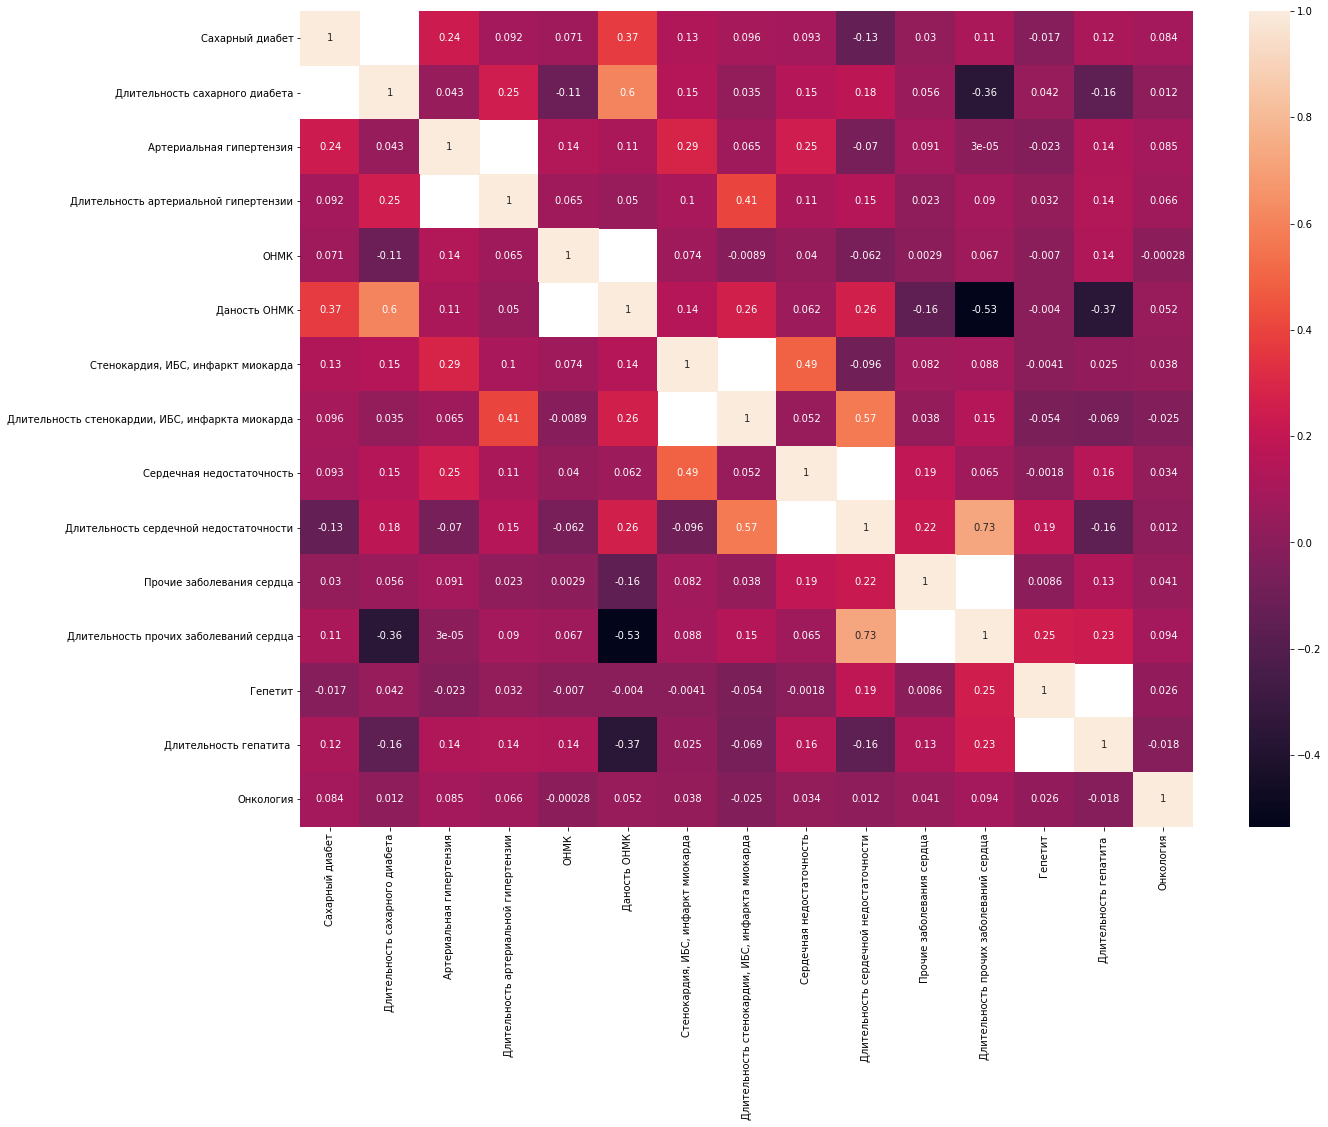

In [9]:
cm = df1.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(cm, annot=True);

### После пары прогонов модели, были определены основные фичи, на основе которых будет работать вся концепция 

In [13]:
df = df[['Пол','Возраст','Крахмал,г',
'1. Средние труд на работе/ дни',
'7. Кефир более 3%',
'В окрестностях практически нет мусора, загрязнения воздуха, чрезмерного уровня шума',
'Прогулка MET-мин/нед',
'Рак: отец, участок',
'Моно-дисахариды,г',
'Сидя на работе / час',
'Углеводы,г',
'12. Реклама фруктов / СМИ',
'Возраст алког',
'Пищ.волокна,г',
'Число перелом',
'144. Конфеты шоколад.',
'43. Мандарины в сезон',
'Деньги на пищу',
'Число телев',
'2. Могут курить / библиотека',
'49. Цветная капуста свежая',
'АТ-Общий транспорт MET-мин/нед',
'141. Блины',
'Общ.оценка MET-мин/нед',
'Алкоголь,%',
'Вода,г',
'Сидя в день',
'32b. Доля фруктов и овощей',
'ДС-Умеренные дом MET-мин/нед',
'Ср.значение/день',
'Общ.к-во Ходьба MET-мин/нед',
'Mg (магний),мг',
'Умеренный MET-мин/нед',
'2. Пешком/ минуты',
'48. Капуста приготов.',
'2. Авто/ дни',
'integral_terr',
'ПНЖК,г',
'C,мкг',
'31. Пять знакомых / ожирение',
'ОНМК']]

for col in df.columns:
    print(df[col].unique())
    

['М' 'Ж' nan]
[54 69 55 61 56 68 57 64 60 52 62 53 41 66 43 47 63 45 35 42 46 65 49 59
 70 58 40 39 37 67 48 44 51 36 50 38]
[ 478842.43757806  417676.81087626 1315838.16502883 ...  778664.44017241
  788385.6843543   688671.11387319]
[ 0.  5. nan  2.  7.  6.  3.  4.  1.]
['1. никогда, реже одного раза в месяц' '2. 1-3 мес'
 'никогда, реже одного раза в месяц' '4. 2-4 нед' '3. 1 нед' '7. 2-3 дн'
 '5. 5-6 нед' '6. 1 дн' '8. 4-5 дн']
['согласен частично' 'полностью не согласен' 'полностью согласен'
 'частично не согласен']
[ 2.77200e+03  6.83100e+03  4.35600e+03  1.98000e+03  3.76200e+03
  3.69600e+03  6.60000e+01  1.38600e+03  8.31600e+03  1.98000e+02
  2.97000e+02  7.92000e+02  7.85400e+03  1.89750e+03  1.18800e+03
  7.59000e+02  9.90000e+02  4.62000e+02  8.51400e+03  3.96000e+02
  1.48500e+03  3.71250e+03  1.74900e+03  5.28000e+02  1.78200e+03
  2.07900e+03  9.24000e+02  6.93000e+02  2.67300e+03  3.30000e+02
  5.54400e+03  7.02900e+03  7.92000e+03  5.94000e+02  5.34600e+03
  8.05200e+0

In [14]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1598 entries, 54-101-001-01 to 54-501-014-02
Data columns (total 41 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   Пол                                                                                  1597 non-null   object 
 1   Возраст                                                                              1598 non-null   int64  
 2   Крахмал,г                                                                            1598 non-null   float64
 3   1. Средние труд на работе/ дни                                                       847 non-null    float64
 4   7. Кефир более 3%                                                                    1598 non-null   object 
 5   В окрестностях практически нет мусора, загрязнения воздуха, чрезмерного ур

In [15]:
columns = ['Пол','Крахмал,г',
'1. Средние труд на работе/ дни',
'7. Кефир более 3%',
'В окрестностях практически нет мусора, загрязнения воздуха, чрезмерного уровня шума',
'Прогулка MET-мин/нед',
'Рак: отец, участок',
'Моно-дисахариды,г',
'Сидя на работе / час',
'Углеводы,г',
'12. Реклама фруктов / СМИ',
'Возраст алког',
'Пищ.волокна,г',
'Число перелом',
'144. Конфеты шоколад.',
'43. Мандарины в сезон',
'Деньги на пищу',
'Число телев',
'2. Могут курить / библиотека',
'49. Цветная капуста свежая',
'АТ-Общий транспорт MET-мин/нед',
'141. Блины',
'Общ.оценка MET-мин/нед',
'Алкоголь,%',
'Вода,г',
'Сидя в день',
'32b. Доля фруктов и овощей',
'ДС-Умеренные дом MET-мин/нед',
'Ср.значение/день',
'Общ.к-во Ходьба MET-мин/нед',
'Mg (магний),мг',
'Умеренный MET-мин/нед',
'2. Пешком/ минуты',
'48. Капуста приготов.',
'2. Авто/ дни',
'integral_terr',
'ПНЖК,г',
'C,мкг',
'31. Пять знакомых / ожирение']
columns
for col in columns:
    df[col] = df[col].apply(str)

# Обучение модели

In [16]:
# Делим выборку на train и test
train_set, test_set = np.split(df, [int(.67 * len(df))])

In [17]:
#Матрица для train
X_train = train_set.drop('ОНМК', axis=1)
y_train = train_set['ОНМК']
#Матрица для test
X_test = test_set.drop('ОНМК', axis=1)
y_test = test_set['ОНМК']

In [18]:
# функция, которая вычисляет MAPE
def mape(y_true, y_pred):
    y_error = y_true - y_pred
    y_error_abs = [abs(i) for i in y_error]
    perc_error_abs = y_error_abs / y_true
    mape = (perc_error_abs.sum() / len(y_true))
    return mape

In [19]:
# Собственно сама сеть
final_model = CatBoostRegressor(iterations=100,
                                depth=16,
                                learning_rate=0.3,
                                random_state=42,
                                loss_function='MultiRMSE',
                                cat_features=columns)

In [20]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1598 entries, 54-101-001-01 to 54-501-014-02
Data columns (total 41 columns):
 #   Column                                                                               Non-Null Count  Dtype 
---  ------                                                                               --------------  ----- 
 0   Пол                                                                                  1598 non-null   object
 1   Возраст                                                                              1598 non-null   int64 
 2   Крахмал,г                                                                            1598 non-null   object
 3   1. Средние труд на работе/ дни                                                       1598 non-null   object
 4   7. Кефир более 3%                                                                    1598 non-null   object
 5   В окрестностях практически нет мусора, загрязнения воздуха, чрезмерного уровня шу

In [21]:
final_model.feature_names_

In [22]:
# Тут мы её "готовим"
final_model.fit(X_train, y_train)

0:	learn: 0.1792263	total: 538ms	remaining: 53.2s
1:	learn: 0.1681255	total: 1.3s	remaining: 1m 3s
2:	learn: 0.1662471	total: 1.31s	remaining: 42.5s
3:	learn: 0.1637972	total: 1.38s	remaining: 33.1s
4:	learn: 0.1629895	total: 1.4s	remaining: 26.6s
5:	learn: 0.1524858	total: 2.18s	remaining: 34.1s
6:	learn: 0.1421166	total: 2.95s	remaining: 39.2s
7:	learn: 0.1403167	total: 3.01s	remaining: 34.6s
8:	learn: 0.1390785	total: 3.03s	remaining: 30.6s
9:	learn: 0.1383688	total: 3.04s	remaining: 27.3s
10:	learn: 0.1328207	total: 3.15s	remaining: 25.5s
11:	learn: 0.1247156	total: 3.92s	remaining: 28.7s
12:	learn: 0.1184061	total: 4.72s	remaining: 31.6s
13:	learn: 0.1134375	total: 5.49s	remaining: 33.7s
14:	learn: 0.1126410	total: 5.5s	remaining: 31.2s
15:	learn: 0.1124114	total: 5.51s	remaining: 28.9s
16:	learn: 0.1122262	total: 5.52s	remaining: 26.9s
17:	learn: 0.1121025	total: 5.53s	remaining: 25.2s
18:	learn: 0.1120976	total: 5.53s	remaining: 23.6s
19:	learn: 0.1063150	total: 5.93s	remaining:

In [23]:
# А вот тут получаем предсказанное значение
y_pred = final_model.predict(X_test)

print('MAE:{:.2f}'.format(
    mean_absolute_error(y_test, y_pred)))

MAE:0.09


In [24]:
# Стоим список с предсказанными значениями
df_preg = pd.Series(data=y_pred, name='prediction')

In [25]:
# Датафрейм с парой фактическое предсказанное
dfg = pd.DataFrame(data=y_test)
dfg = dfg.reset_index()
dfg['predict'] = df_preg

In [26]:
# Собираем готовую таблицу со всеми значениями
ready = dfg.join(df, how='left', on='ID', rsuffix='r')
ready = ready.drop('ID', axis=1).reset_index()
ready['predict'] = ready['predict'].round(decimals=5)
print(ready.shape)
ready.head(3)

(528, 44)


,index,ОНМК,predict,Пол,Возраст,"Крахмал,г",1. Средние труд на работе/ дни,7. Кефир более 3%,"В окрестностях практически нет мусора, загрязнения воздуха, чрезмерного уровня шума",Прогулка MET-мин/нед,"Рак: отец, участок","Моно-дисахариды,г",Сидя на работе / час,"Углеводы,г",12. Реклама фруктов / СМИ,Возраст алког,"Пищ.волокна,г",Число перелом,144. Конфеты шоколад.,43. Мандарины в сезон,Деньги на пищу,Число телев,2. Могут курить / библиотека,49. Цветная капуста свежая,АТ-Общий транспорт MET-мин/нед,141. Блины,Общ.оценка MET-мин/нед,"Алкоголь,%","Вода,г",Сидя в день,32b. Доля фруктов и овощей,ДС-Умеренные дом MET-мин/нед,Ср.значение/день,Общ.к-во Ходьба MET-мин/нед,"Mg (магний),мг",Умеренный MET-мин/нед,2. Пешком/ минуты,48. Капуста приготов.,2. Авто/ дни,integral_terr,"ПНЖК,г","C,мкг",31. Пять знакомых / ожирение,ОНМКr
0,0,0,0.06117,Ж,66,1323405.5654573739,nan,"1. никогда, реже одного раза в месяц",согласен частично,1369.5,nan,411641.9870862462,15.0,190300.42396721357,0,20.0,209140.44821435763,3.0,6. 1 дн,2. 1-3 мес,8000.0,2,"ни в закрытых помещениях, ни вне помещений объ...","1. никогда, реже одного раза в месяц",445.5,3. 1 нед,4099.5,0.0,8169.47054524832,-0.14,100.0,1890,0.0,1369.5,46655.79605060921,3360,45,3. 1 нед,0,74.0,2957.5,75332.33265738681,0,0
1,1,0,-0.00502,Ж,65,471875.7430191671,nan,"1. никогда, реже одного раза в месяц",полностью согласен,66.0,nan,186638.43469759918,5.0,71539.60999484835,1,21.0,222199.19571280188,nan,8. 4-5 дн,2. 1-3 мес,20000.0,4,только вне помещений,"1. никогда, реже одного раза в месяц",66.0,2. 1-3 мес,696.0,4766.666666666666,12658.979646773994,85.71,100.0,270,0.0,66.0,43458.27901085849,720,20,4. 2-4 нед,0,49.0,673.773684542388,53740.82526086308,1,0
2,2,0,-0.00676,Ж,64,375426.8485810248,7.0,"1. никогда, реже одного раза в месяц",согласен частично,7161.0,nan,161997.73053360253,2.0,49231.07860369238,1,17.0,251710.32126256,nan,6. 1 дн,4. 2-4 нед,10000.0,1,только вне помещений,"1. никогда, реже одного раза в месяц",924.0,3. 1 нед,12551.0,14391.363636363634,6553.817056438705,60.0,70.0,630,150.0,7161.0,28938.017029488372,5600,40,3. 1 нед,0,110.0,1580.515412149013,76806.36423165414,1,0


In [27]:
# Получим вес каждого из параметров
importances = final_model.feature_importances_

In [28]:
# Получим список параметров
mm = pd.DataFrame(X_test.columns.to_list())

In [29]:
# Добавим к списку параметров их вес
mm['importances'] = importances.round(decimals=4)
mm.sort_values(by='importances')

,0,importances
31,"Mg (магний),мг",0.0000
37,"ПНЖК,г",0.0000
2,"Крахмал,г",0.0000
38,"C,мкг",0.0000
25,"Вода,г",0.0000
13,"Пищ.волокна,г",0.0000
8,"Моно-дисахариды,г",0.0000
10,"Углеводы,г",0.0000
30,Общ.к-во Ходьба MET-мин/нед,0.0001
29,Ср.значение/день,0.2194


In [30]:
#Сохранение модели для дальнейшего импорта
final_model.save_model('final_model.cbm')

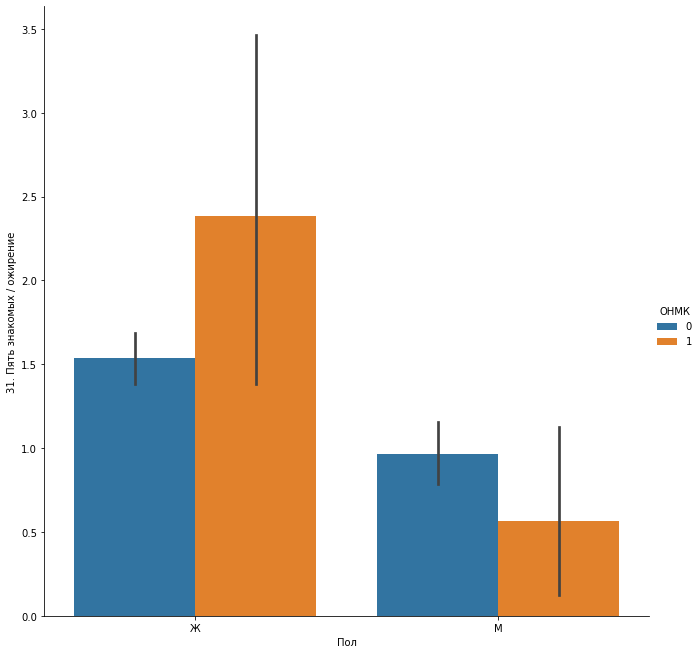

In [36]:
ready['31. Пять знакомых / ожирение'] = ready['31. Пять знакомых / ожирение'].apply(int)
g = sns.catplot(x="Пол", y="31. Пять знакомых / ожирение",
                hue="ОНМК",
                data=ready, kind="bar",
                height=9);

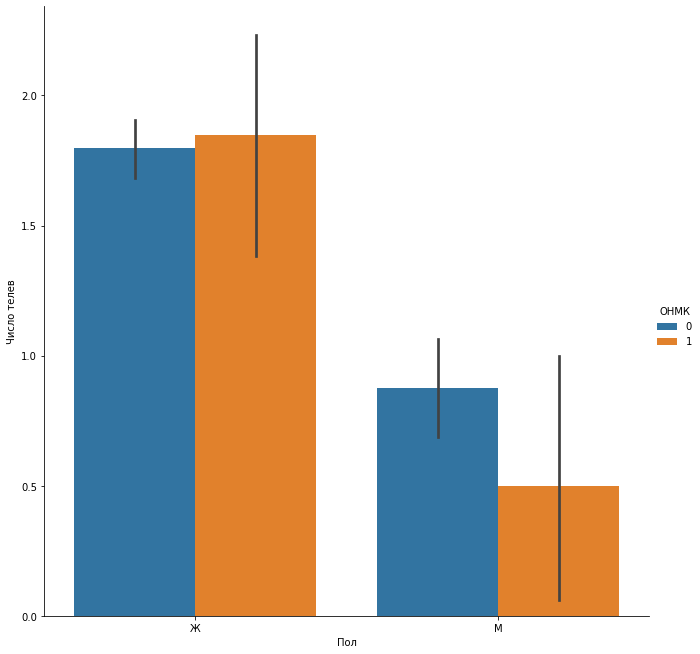

In [40]:
ready['Число телев'] = ready['Число телев'].apply(int)
g = sns.catplot(x="Пол", y="Число телев",
                hue="ОНМК",
                data=ready, kind="bar",
                height=9);